# Домашняя работа

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!wget 'https://drive.google.com/uc?export=download&id=1xwXieDVy1RKdfiJ6am_nNWp6XhAYdhNb' -O airline-passengers.csv

--2022-02-26 16:03:30--  https://drive.google.com/uc?export=download&id=1xwXieDVy1RKdfiJ6am_nNWp6XhAYdhNb
Resolving drive.google.com (drive.google.com)... 173.194.194.100, 173.194.194.113, 173.194.194.101, ...
Connecting to drive.google.com (drive.google.com)|173.194.194.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-08-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/a78c033kogd735i5g2m7s8tng4hdopce/1645891350000/14904333240138417226/*/1xwXieDVy1RKdfiJ6am_nNWp6XhAYdhNb?e=download [following]
--2022-02-26 16:03:30--  https://doc-08-c0-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/a78c033kogd735i5g2m7s8tng4hdopce/1645891350000/14904333240138417226/*/1xwXieDVy1RKdfiJ6am_nNWp6XhAYdhNb?e=download
Resolving doc-08-c0-docs.googleusercontent.com (doc-08-c0-docs.googleusercontent.com)... 108.177.111.132, 2607:f8b0:4001:c07::84
Connecting to doc-08-c0-docs.googleusercontent.com (doc-08-c0

In [ ]:
raf_df = pd.read_csv('/content/airline-passengers.csv')
raf_df.head(2)

,Month,Passengers
0,1949-01,112
1,1949-02,118


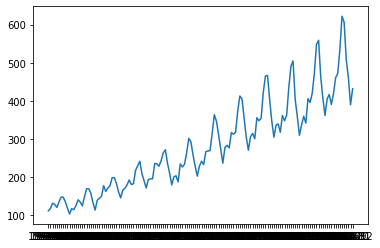

In [ ]:
plt.plot(raf_df['Month'], raf_df['Passengers'])

In [ ]:
raf_df['Month'] = pd.to_datetime(raf_df['Month'], format='%Y-%m')

In [ ]:
raf_df['month'] = raf_df['Month'].dt.month
raf_df['year'] = raf_df['Month'].dt.year
raf_df['quarter'] = raf_df['Month'].dt.quarter
raf_df['day_of_year'] = raf_df['Month'].dt.day_of_year
raf_df['weekofyear'] = raf_df['Month'].dt.weekofyear
raf_df['is_quarter_start'] = raf_df['Month'].dt.is_quarter_start
raf_df['is_quarter_end'] = raf_df['Month'].dt.is_quarter_end
raf_df['is_year_start'] = raf_df['Month'].dt.is_year_start
raf_df['is_year_end'] = raf_df['Month'].dt.is_year_end


raf_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


,Month,Passengers,month,year,quarter,day_of_year,weekofyear,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,1949-01-01,112,1,1949,1,1,53,True,False,True,False
1,1949-02-01,118,2,1949,1,32,5,False,False,False,False
2,1949-03-01,132,3,1949,1,60,9,False,False,False,False
3,1949-04-01,129,4,1949,2,91,13,True,False,False,False
4,1949-05-01,121,5,1949,2,121,17,False,False,False,False


In [ ]:
data = raf_df.iloc[:, 1:]
data.head()

,Passengers,month,year,quarter,day_of_year,weekofyear,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,112,1,1949,1,1,53,True,False,True,False
1,118,2,1949,1,32,5,False,False,False,False
2,132,3,1949,1,60,9,False,False,False,False
3,129,4,1949,2,91,13,True,False,False,False
4,121,5,1949,2,121,17,False,False,False,False


In [ ]:
data.shape

(144, 10)

In [ ]:
train_size = 90

features = data.columns.to_list()

bias = 5

train_data = data.iloc[:train_size][features]
val_data = data.iloc[train_size + bias:][features]

train_data.shape, val_data.shape

((90, 10), (49, 10))

In [ ]:
features = train_data.columns[1:]
target = train_data.columns[0]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_data[features] = scaler.fit_transform(train_data[features])
val_data[features] = scaler.transform(val_data[features])

train_data.head()

,Passengers,month,year,quarter,day_of_year,weekofyear,is_quarter_start,is_quarter_end,is_year_start,is_year_end
0,112,-1.537902,-1.502191,-1.284298,-1.531587,1.747408,1.414214,0.0,3.201562,0.0
1,118,-1.247732,-1.502191,-1.284298,-1.235889,-1.397926,-0.707107,0.0,-0.312348,0.0
2,132,-0.957561,-1.502191,-1.284298,-0.968807,-1.135815,-0.707107,0.0,-0.312348,0.0
3,129,-0.667391,-1.502191,-0.388276,-0.673110,-0.873704,1.414214,0.0,-0.312348,0.0
4,121,-0.377221,-1.502191,-0.388276,-0.386951,-0.611593,-0.707107,0.0,-0.312348,0.0


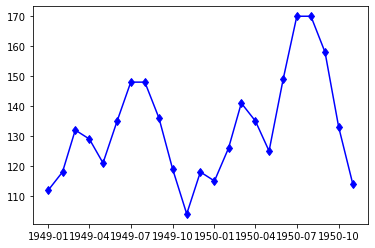

In [ ]:
plt.plot(raf_df['Month'][:23], raf_df['Passengers'][:23], '-db')

In [ ]:
x_len = 23

future = 1

batch_size = 30


In [ ]:
start = x_len + future
end = start + train_size

print(start, end)

X_train = train_data[features].values
y_train = data.iloc[start:end][target].values

x_end = len(val_data) - x_len - future
label_start = len(train_data) + bias + x_len + future
print(x_end, label_start)

X_val = val_data.iloc[:x_end][features].values
y_val = data.iloc[label_start:][target].values

24 114
25 119


In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape

((90, 9), (90,), (25, 9), (25,))

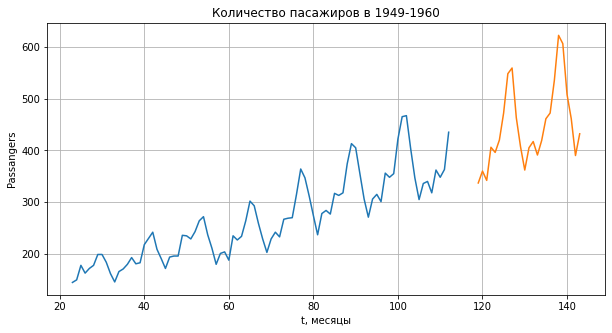

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data.index[x_len:y_train.shape[0]+x_len],y_train[:])
plt.plot(data.index[y_train.shape[0]+x_len+bias+future:],y_val[:])
plt.grid('on')
plt.xlabel('t, месяцы')
plt.ylabel('Passangers')
plt.title('Количество пасажиров в 1949-1960')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import timeseries_dataset_from_array

dataset_train = timeseries_dataset_from_array(
    X_train,
    y_train,
    sequence_length=x_len,
    sampling_rate=1,
    batch_size=batch_size,
)

dataset_val = timeseries_dataset_from_array(
    X_val,
    y_val,
    sequence_length=x_len,
    sampling_rate=1,
    batch_size=batch_size,
)

In [ ]:
for batch in dataset_train.take(1):
    inputs, targets = batch
    print("Input shape:", inputs.shape)
    print(inputs[1])
    print("Target shape:", targets.shape)
    print(targets[1])

Input shape: (30, 23, 9)
tf.Tensor(
[[-1.24773159 -1.50219138 -1.28429754 -1.23588906 -1.39792649 -0.70710678
   0.         -0.31234752  0.        ]
 [-0.95756146 -1.50219138 -1.28429754 -0.9688073  -1.13581527 -0.70710678
   0.         -0.31234752  0.        ]
 [-0.66739132 -1.50219138 -0.388276   -0.67310963 -0.87370406  1.41421356
   0.         -0.31234752  0.        ]
 [-0.37722118 -1.50219138 -0.388276   -0.3869506  -0.61159284 -0.70710678
   0.         -0.31234752  0.        ]
 [-0.08705104 -1.50219138 -0.388276   -0.09125294 -0.28395382 -0.70710678
   0.         -0.31234752  0.        ]
 [ 0.2031191  -1.50219138  0.50774554  0.1949061  -0.0218426   1.41421356
   0.         -0.31234752  0.        ]
 [ 0.49328923 -1.50219138  0.50774554  0.49060376  0.30579642 -0.70710678
   0.         -0.31234752  0.        ]
 [ 0.78345937 -1.50219138  0.50774554  0.78630143  0.56790764 -0.70710678
   0.         -0.31234752  0.        ]
 [ 1.07362951 -1.50219138  1.40376707  1.07246046  0.8300188

## 1. Попробуйте обучить нейронную сеть RNN/LSTM/GRU на любом другом датасете (любимый временной ряд, текст на русском (другом языке) как генератор или классификатор, или прилагаемый набор airline-passengers - пасажиропоток для авиалиний). 



### RNN

In [ ]:
inputs.shape

TensorShape([30, 23, 9])

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten, Conv1D
from keras.models import Sequential
from keras.callbacks import EarlyStopping

tf.random.set_seed(1)

learnign_rate = 0.01
epochs = 50

early_stop = EarlyStopping(monitor='val_mae', patience=50)

model = Sequential()

model.add(SimpleRNN(32, input_shape=(inputs.shape[1], inputs.shape[2]), return_sequences=True)) 
model.add(SimpleRNN(32, return_sequences=True)) 
model.add(Conv1D(64, 3, activation='relu')) 
model.add(Conv1D(64, 1, activation='linear')) 
model.add(Flatten()) 

model.add(Dense(255, activation='linear')) 
model.add(Dense(50, activation='relu')) 
model.add(Dense(1, activation='relu')) 

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

history = model.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_val,
                    callbacks=[early_stop])

Epoch 1/50
3/3 [==============================] - 12s 353ms/step - loss: 59069.8125 - mae: 235.4064 - val_loss: 114420.2266 - val_mae: 338.1158
Epoch 2/50
3/3 [==============================] - 0s 111ms/step - loss: 54386.9844 - mae: 225.5653 - val_loss: 102416.8438 - val_mae: 319.8761
Epoch 3/50
3/3 [==============================] - 0s 119ms/step - loss: 45101.0820 - mae: 204.6905 - val_loss: 80184.7109 - val_mae: 283.0076
Epoch 4/50
3/3 [==============================] - 0s 121ms/step - loss: 29398.5098 - mae: 163.3134 - val_loss: 45658.3125 - val_mae: 213.4799
Epoch 5/50
3/3 [==============================] - 0s 113ms/step - loss: 9864.7168 - mae: 87.8190 - val_loss: 8516.1318 - val_mae: 91.8737
Epoch 6/50
3/3 [==============================] - 0s 121ms/step - loss: 3034.4277 - mae: 47.1161 - val_loss: 1215.2208 - val_mae: 33.7849
Epoch 7/50
3/3 [==============================] - 0s 120ms/step - loss: 17223.5742 - mae: 123.0919 - val_loss: 400.4273 - val_mae: 17.9431
Epoch 8/50
3/3

In [65]:
model = Sequential()

model.add(SimpleRNN(32, input_shape=(inputs.shape[1], inputs.shape[2]), return_sequences=True)) 
model.add(SimpleRNN(32, return_sequences=True)) 
model.add(Conv1D(64, 3, activation='relu')) 
model.add(Conv1D(64, 1, activation='linear')) 
model.add(Flatten()) 

model.add(Dense(255, activation='linear')) 
model.add(Dense(50, activation='relu')) 
model.add(Dense(1, activation='relu')) 

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

model.summary()

Model: "sequential_76"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_42 (SimpleRNN)   (None, 23, 32)            1344      
                                                                 
 simple_rnn_43 (SimpleRNN)   (None, 23, 32)            2080      
                                                                 
 conv1d_49 (Conv1D)          (None, 21, 64)            6208      
                                                                 
 conv1d_50 (Conv1D)          (None, 21, 64)            4160      
                                                                 
 flatten_75 (Flatten)        (None, 1344)              0         
                                                                 
 dense_223 (Dense)           (None, 255)               342975    
                                                                 
 dense_224 (Dense)           (None, 50)              

Исследуем влияния количества скрытых ячеек на качества прогноза

In [ ]:
from tqdm import tqdm

100%|██████████| 8/8 [01:42<00:00, 12.84s/it]


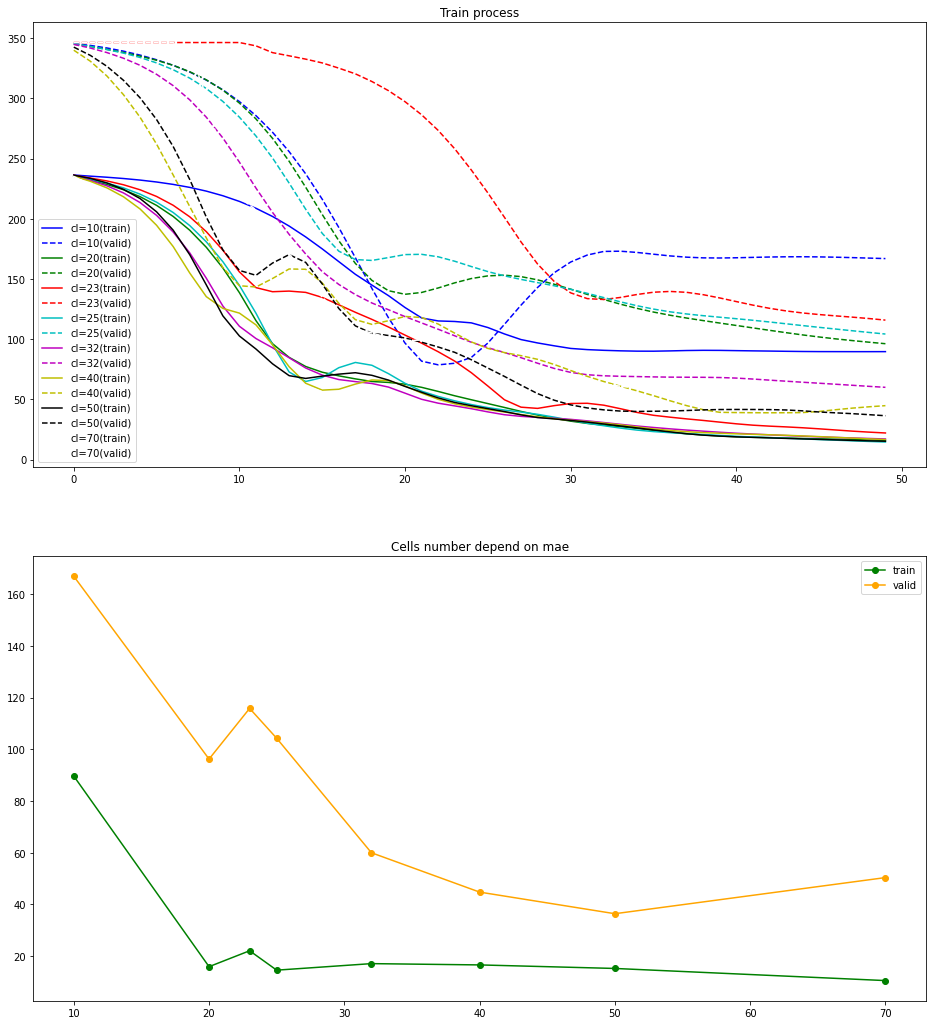

In [ ]:
tf.random.set_seed(1)

cells_number = [10, 20, 23, 25, 32, 40, 50, 70]
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

last_errors_mae = []
last_errors_val_mae = []

plt.figure(figsize=(16, 18))
ax1 = plt.subplot(211)

for i, cell_number in tqdm(enumerate(cells_number), total=len(cells_number)):
  model = Sequential()

  model.add(SimpleRNN(cell_number, input_shape=(inputs.shape[1], inputs.shape[2]), return_sequences=True))
  model.add(Flatten())
  model.add(Dense(255, activation='linear')) 
  model.add(Dense(50, activation='relu')) 
  model.add(Dense(1, activation='relu'))

  model.compile(loss='mse', optimizer='adam', metrics=['mae'])

  history = model.fit(dataset_train,
                      epochs=epochs,
                      validation_data=dataset_val, 
                      verbose=0)
  
  ax1.plot(history.history['mae'], '-', label=f'cl={cell_number}(train)', c=colors[i])
  ax1.plot(history.history['val_mae'], '--', label=f'cl={cell_number}(valid)', c=colors[i])

  last_errors_mae.append(history.history['mae'][-1])
  last_errors_val_mae.append(history.history['val_mae'][-1])


ax1.legend(loc=0)
ax1.set_title('Train process')

ax2 = plt.subplot(212)
ax2.set_title('Cells number depend on mae')
ax2.plot(cells_number, last_errors_mae, '-o', label='train', c='green')
ax2.plot(cells_number, last_errors_val_mae, '-o', label='valid', c='orange')
ax2.legend(loc=0)

plt.show()
  

Видно, что с увеличением количества скрытых ячеек ошибка падает и затем начинает расти. Проверим будет ли такая же ситуация если мы будем использовать два слоя

100%|██████████| 8/8 [02:34<00:00, 19.30s/it]


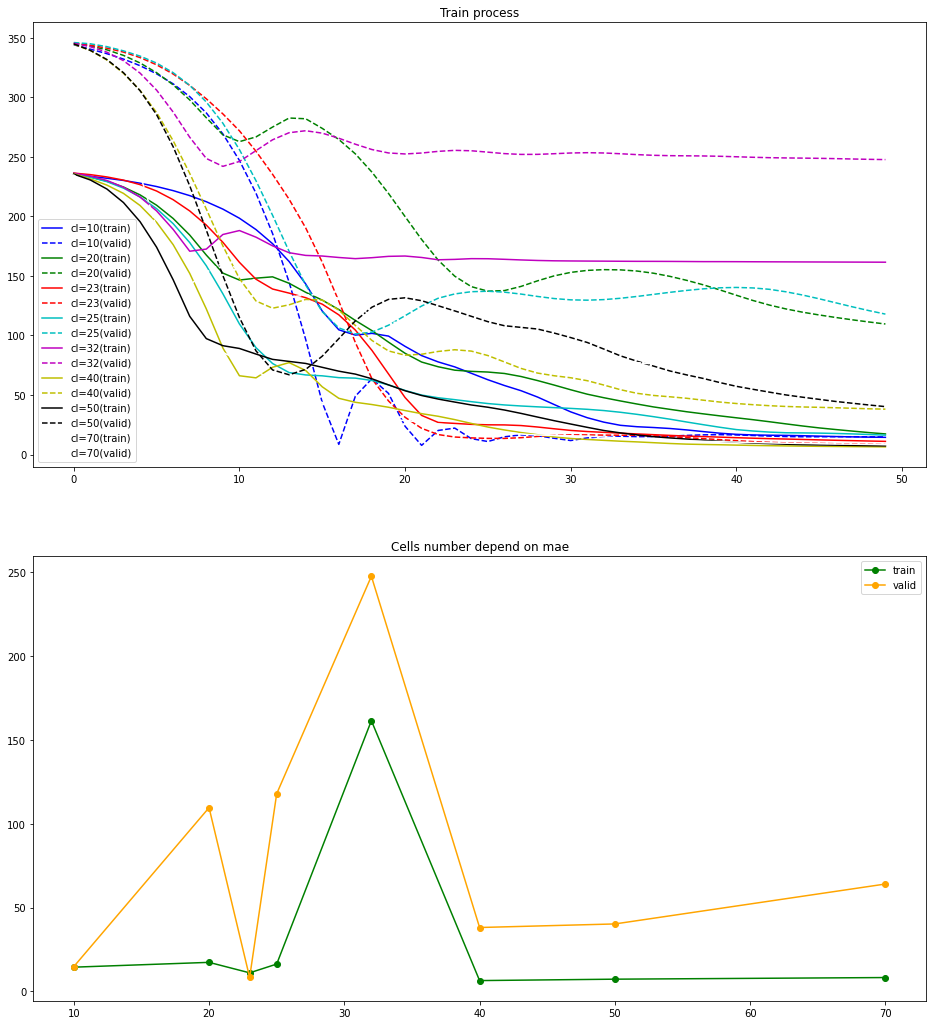

In [ ]:
tf.random.set_seed(1)

cells_number = [10, 20, 23, 25, 32, 40, 50, 70]
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

last_errors_mae = []
last_errors_val_mae = []

plt.figure(figsize=(16, 18))
ax1 = plt.subplot(211)

for i, cell_number in tqdm(enumerate(cells_number), total=len(cells_number)):
  model = Sequential()

  model.add(SimpleRNN(cell_number, input_shape=(inputs.shape[1], inputs.shape[2]), return_sequences=True))
  model.add(SimpleRNN(cell_number, input_shape=(inputs.shape[1], inputs.shape[2]), return_sequences=True))
  model.add(Flatten())
  model.add(Dense(255, activation='linear')) 
  model.add(Dense(50, activation='relu')) 
  model.add(Dense(1, activation='relu'))

  model.compile(loss='mse', optimizer='adam', metrics=['mae'])

  history = model.fit(dataset_train,
                      epochs=epochs,
                      validation_data=dataset_val, 
                      verbose=0)
  
  ax1.plot(history.history['mae'], '-', label=f'cl={cell_number}(train)', c=colors[i])
  ax1.plot(history.history['val_mae'], '--', label=f'cl={cell_number}(valid)', c=colors[i])

  last_errors_mae.append(history.history['mae'][-1])
  last_errors_val_mae.append(history.history['val_mae'][-1])


ax1.legend(loc=0)
ax1.set_title('Train process')

ax2 = plt.subplot(212)
ax2.set_title('Cells number depend on mae')
ax2.plot(cells_number, last_errors_mae, '-o', label='train', c='green')
ax2.plot(cells_number, last_errors_val_mae, '-o', label='valid', c='orange')
ax2.legend(loc=0)

plt.show()
  

С двумя слоями такая линейная зависимость пропадает. В итоге мы видим, что есть локальные минимум. Равный 23, который совпадает с выбраным нами количеством данных для последовательности подаваемой на вход

Теперь проделаем тоже самое, но на полной модели нашей нейронной сети

100%|██████████| 8/8 [02:37<00:00, 19.67s/it]


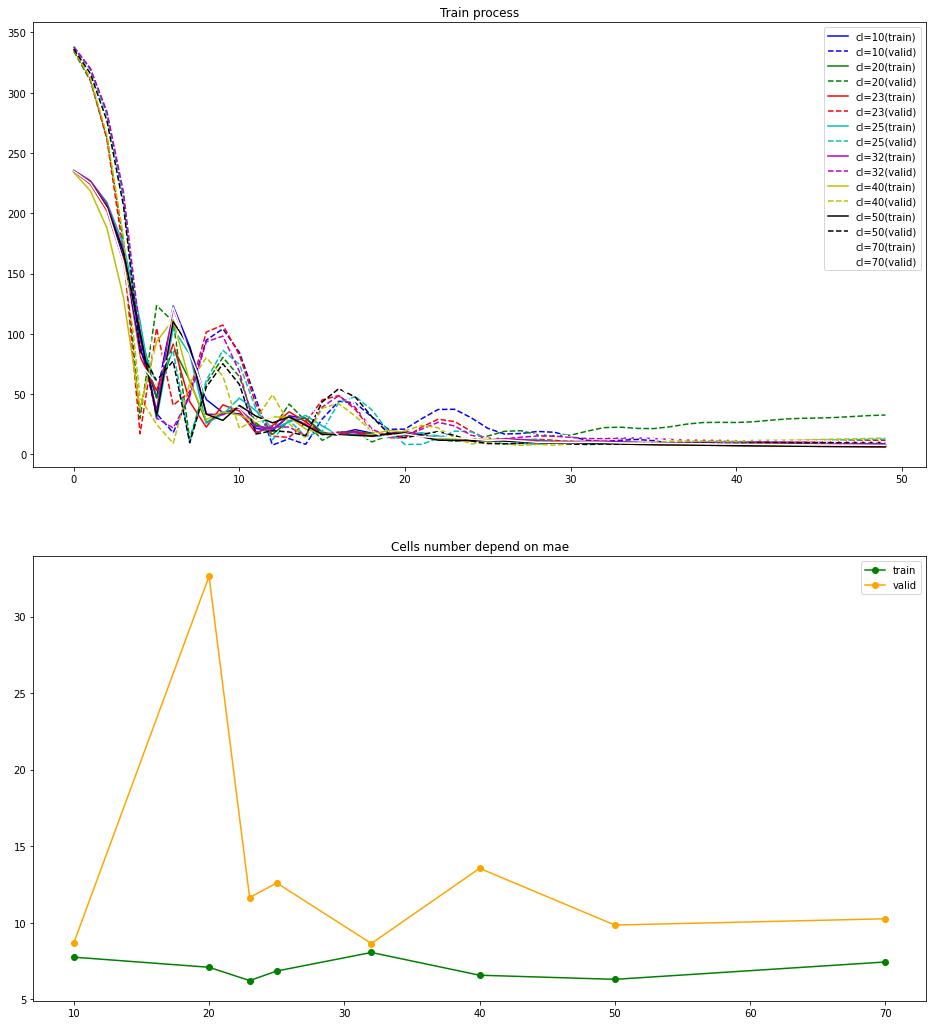

In [ ]:
tf.random.set_seed(1)

cells_number = [10, 20, 23, 25, 32, 40, 50, 70]
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

last_errors_mae = []
last_errors_val_mae = []

plt.figure(figsize=(16, 18))
ax1 = plt.subplot(211)

for i, cell_number in tqdm(enumerate(cells_number), total=len(cells_number)):
  model = Sequential()

  model.add(SimpleRNN(32, input_shape=(inputs.shape[1], inputs.shape[2]), return_sequences=True)) 
  model.add(SimpleRNN(32, return_sequences=True)) 
  model.add(Conv1D(64, 3, activation='relu')) 
  model.add(Conv1D(64, 1, activation='linear')) 
  model.add(Flatten()) 

  model.add(Dense(255, activation='linear')) 
  model.add(Dense(50, activation='relu')) 
  model.add(Dense(1, activation='relu')) 

  model.compile(loss='mse', optimizer='adam', metrics=['mae'])

  history = model.fit(dataset_train,
                      epochs=epochs,
                      validation_data=dataset_val, 
                      verbose=0)
  
  ax1.plot(history.history['mae'], '-', label=f'cl={cell_number}(train)', c=colors[i])
  ax1.plot(history.history['val_mae'], '--', label=f'cl={cell_number}(valid)', c=colors[i])

  last_errors_mae.append(history.history['mae'][-1])
  last_errors_val_mae.append(history.history['val_mae'][-1])


ax1.legend(loc=0)
ax1.set_title('Train process')

ax2 = plt.subplot(212)
ax2.set_title('Cells number depend on mae')
ax2.plot(cells_number, last_errors_mae, '-o', label='train', c='green')
ax2.plot(cells_number, last_errors_val_mae, '-o', label='valid', c='orange')
ax2.legend(loc=0)

plt.show()
  

Здесь ситуация изменилась. Видно, что минимальная точка на valid данных другая и равная 32. Что соответствует нашему первоначальному значению  

### LSTM

Исследуем влияние замены модели с SimpleRNN на LSTM на точность

In [49]:
from tensorflow.keras.layers import LSTM

tf.random.set_seed(1)

learnign_rate = 0.01
epochs = 150


model = Sequential()

model.add(LSTM(32, input_shape=(inputs.shape[1], inputs.shape[2]), return_sequences=True, dropout=0)) 
model.add(Flatten()) 

model.add(Dense(255, activation='linear')) 
model.add(Dense(50, activation='relu')) 
model.add(Dense(1, activation='relu')) 

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

model.summary()

Model: "sequential_56"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_36 (LSTM)              (None, 23, 32)            5376      
                                                                 
 flatten_55 (Flatten)        (None, 736)               0         
                                                                 
 dense_163 (Dense)           (None, 255)               187935    
                                                                 
 dense_164 (Dense)           (None, 50)                12800     
                                                                 
 dense_165 (Dense)           (None, 1)                 51        
                                                                 
Total params: 206,162
Trainable params: 206,162
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_val)

Epoch 1/200
3/3 [==============================] - 3s 332ms/step - loss: 59629.0938 - mae: 236.4625 - val_loss: 118754.2500 - val_mae: 344.4664
Epoch 2/200
3/3 [==============================] - 0s 54ms/step - loss: 59351.2695 - mae: 235.9662 - val_loss: 116665.0703 - val_mae: 341.4219
Epoch 3/200
3/3 [==============================] - 0s 56ms/step - loss: 58914.0508 - mae: 235.1933 - val_loss: 113543.7500 - val_mae: 336.8214
Epoch 4/200
3/3 [==============================] - 0s 55ms/step - loss: 58238.3789 - mae: 233.9999 - val_loss: 109217.2109 - val_mae: 330.3381
Epoch 5/200
3/3 [==============================] - 0s 64ms/step - loss: 57208.6602 - mae: 232.1629 - val_loss: 103270.5625 - val_mae: 321.2129
Epoch 6/200
3/3 [==============================] - 0s 55ms/step - loss: 55639.8438 - mae: 229.3090 - val_loss: 95114.6484 - val_mae: 308.2577
Epoch 7/200
3/3 [==============================] - 0s 55ms/step - loss: 53258.8594 - mae: 224.8454 - val_loss: 84097.7344 - val_mae: 289.8388


Модели нужно больше эпох для очучения. Проведем аналогичные иследования (увеличение точности от количества ячеек) 

100%|██████████| 8/8 [04:50<00:00, 36.34s/it]


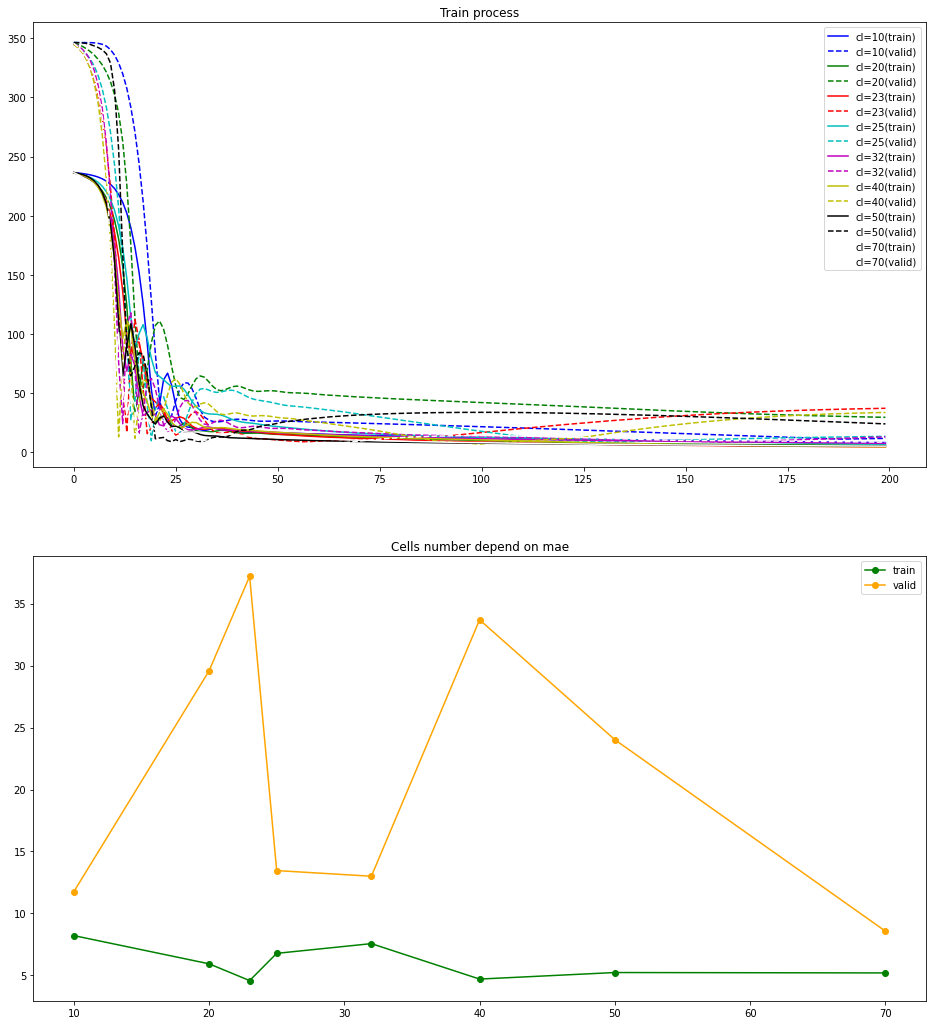

In [48]:
tf.random.set_seed(1)

cells_number = [10, 20, 23, 25, 32, 40, 50, 70]
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

last_errors_mae = []
last_errors_val_mae = []

plt.figure(figsize=(16, 18))
ax1 = plt.subplot(211)

for i, cell_number in tqdm(enumerate(cells_number), total=len(cells_number)):
  model = Sequential()

  model.add(LSTM(cell_number, input_shape=(inputs.shape[1], inputs.shape[2]), return_sequences=True, dropout=0)) 
  model.add(Flatten())
  model.add(Dense(255, activation='linear')) 
  model.add(Dense(50, activation='relu')) 
  model.add(Dense(1, activation='relu'))

  model.compile(loss='mse', optimizer='adam', metrics=['mae'])

  history = model.fit(dataset_train,
                      epochs=epochs,
                      validation_data=dataset_val, 
                      verbose=0)
  
  ax1.plot(history.history['mae'], '-', label=f'cl={cell_number}(train)', c=colors[i])
  ax1.plot(history.history['val_mae'], '--', label=f'cl={cell_number}(valid)', c=colors[i])

  last_errors_mae.append(history.history['mae'][-1])
  last_errors_val_mae.append(history.history['val_mae'][-1])


ax1.legend(loc=0)
ax1.set_title('Train process')

ax2 = plt.subplot(212)
ax2.set_title('Cells number depend on mae')
ax2.plot(cells_number, last_errors_mae, '-o', label='train', c='green')
ax2.plot(cells_number, last_errors_val_mae, '-o', label='valid', c='orange')
ax2.legend(loc=0)

plt.show()
  

Влияние схожее. Даже лучшее значение такое же

### GRU

In [62]:
from tensorflow.keras.layers import GRU

tf.random.set_seed(1)

epochs=80

learnign_rate = 0.01



model = Sequential()

model.add(GRU(32, input_shape=(inputs.shape[1], inputs.shape[2]), return_sequences=True, dropout=0)) 
model.add(Flatten()) 

model.add(Dense(255, activation='linear')) 
model.add(Dense(50, activation='relu')) 
model.add(Dense(1, activation='relu')) 

model.compile(loss='mse', optimizer='adam', metrics=['mae'])

model.summary()

Model: "sequential_67"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_11 (GRU)                (None, 23, 32)            4128      
                                                                 
 flatten_66 (Flatten)        (None, 736)               0         
                                                                 
 dense_196 (Dense)           (None, 255)               187935    
                                                                 
 dense_197 (Dense)           (None, 50)                12800     
                                                                 
 dense_198 (Dense)           (None, 1)                 51        
                                                                 
Total params: 204,914
Trainable params: 204,914
Non-trainable params: 0
_________________________________________________________________


In [63]:
history = model.fit(dataset_train,
                    epochs=epochs,
                    validation_data=dataset_val)

Epoch 1/100
3/3 [==============================] - 3s 293ms/step - loss: 59530.9180 - mae: 236.2880 - val_loss: 119787.7734 - val_mae: 345.9659
Epoch 2/100
3/3 [==============================] - 0s 53ms/step - loss: 58890.3828 - mae: 235.0362 - val_loss: 119003.3125 - val_mae: 344.8320
Epoch 3/100
3/3 [==============================] - 0s 56ms/step - loss: 58063.7266 - mae: 233.4595 - val_loss: 118298.2578 - val_mae: 343.8039
Epoch 4/100
3/3 [==============================] - 0s 54ms/step - loss: 56996.5898 - mae: 231.4167 - val_loss: 117441.9375 - val_mae: 342.5523
Epoch 5/100
3/3 [==============================] - 0s 53ms/step - loss: 55550.9062 - mae: 228.6103 - val_loss: 116427.6016 - val_mae: 341.0640
Epoch 6/100
3/3 [==============================] - 0s 57ms/step - loss: 53670.4414 - mae: 224.8923 - val_loss: 115202.2578 - val_mae: 339.2590
Epoch 7/100
3/3 [==============================] - 0s 56ms/step - loss: 51222.1484 - mae: 219.8838 - val_loss: 113526.6250 - val_mae: 336.781

100%|██████████| 8/8 [02:34<00:00, 19.37s/it]


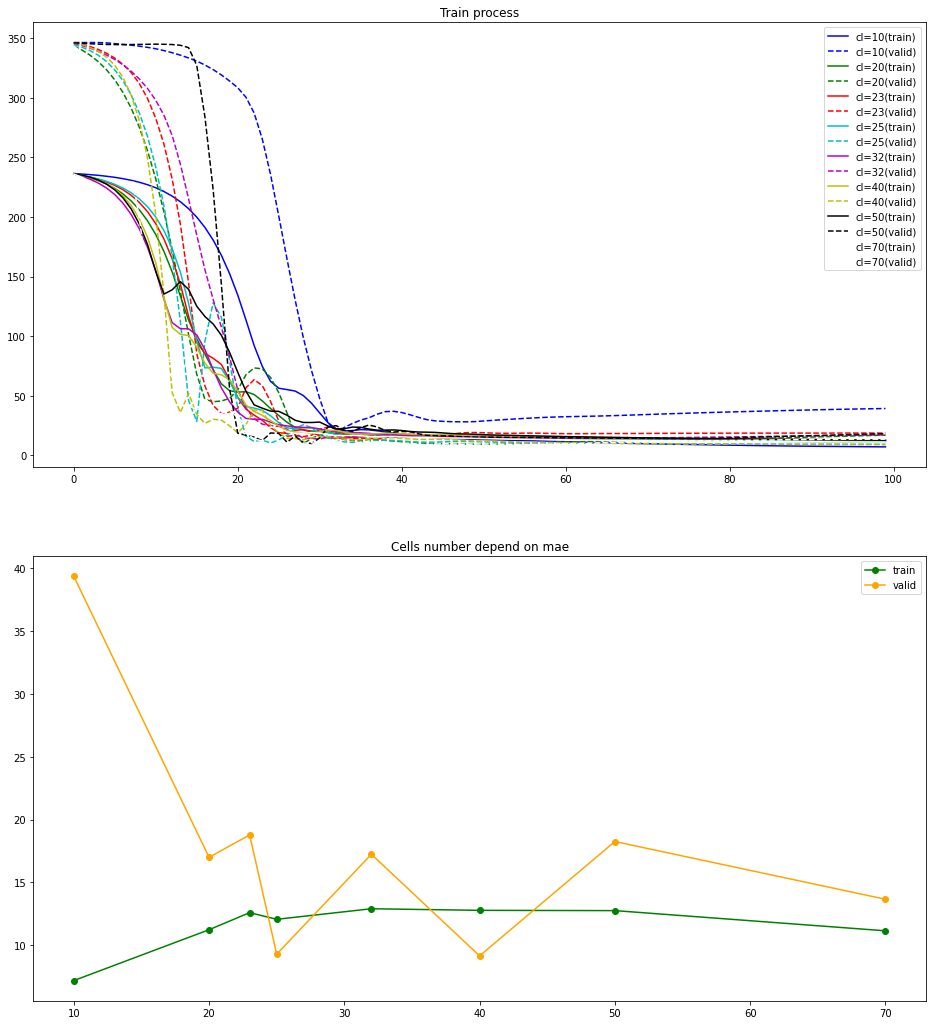

In [64]:
tf.random.set_seed(1)

cells_number = [10, 20, 23, 25, 32, 40, 50, 70]
colors=['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

last_errors_mae = []
last_errors_val_mae = []

plt.figure(figsize=(16, 18))
ax1 = plt.subplot(211)

for i, cell_number in tqdm(enumerate(cells_number), total=len(cells_number)):
  model = Sequential()

  model.add(GRU(cell_number, input_shape=(inputs.shape[1], inputs.shape[2]), return_sequences=True, dropout=0)) 
  model.add(Flatten())
  model.add(Dense(255, activation='linear')) 
  model.add(Dense(50, activation='relu')) 
  model.add(Dense(1, activation='relu'))

  model.compile(loss='mse', optimizer='adam', metrics=['mae'])

  history = model.fit(dataset_train,
                      epochs=epochs,
                      validation_data=dataset_val, 
                      verbose=0)
  
  ax1.plot(history.history['mae'], '-', label=f'cl={cell_number}(train)', c=colors[i])
  ax1.plot(history.history['val_mae'], '--', label=f'cl={cell_number}(valid)', c=colors[i])

  last_errors_mae.append(history.history['mae'][-1])
  last_errors_val_mae.append(history.history['val_mae'][-1])


ax1.legend(loc=0)
ax1.set_title('Train process')

ax2 = plt.subplot(212)
ax2.set_title('Cells number depend on mae')
ax2.plot(cells_number, last_errors_mae, '-o', label='train', c='green')
ax2.plot(cells_number, last_errors_val_mae, '-o', label='valid', c='orange')
ax2.legend(loc=0)

plt.show()
  

## Опишите, какой результат вы получили? Что помогло вам улучшить ее точность?

Сама архетиктура сети помогает больше всего. Зависимость точности от количества скрытых ячеек не линейная. Есть локальный минимум. LSTM и GRU обучаются медленее.